In [39]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import joblib

#import Sckit-helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

#import Scikit-learn machine models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#import performance metrics functions
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, accuracy_score

In [40]:
#importing dataset
dataset = pd.read_csv('pre_processed_dataset.csv')
dataset.head()

,Unnamed: 0,username,date,content,preprocess_content,sentiment,sentiment_score
0,0,4928,2021-04-22,This is the highest form of intimidation\nWhat...,highest form intimidation offence commit answe...,negative,0.999112
1,1,382,2021-04-22,Why is it taking a life long time for @MBuhari...,taking life long time mbuhari sack drisapantam...,negative,0.999227
2,2,5768,2021-04-22,"Even Desmond Elliot is quite , ,,, what is tha...",desmond elliot womans look like jellof rice wa...,negative,0.995843
3,3,1441,2021-04-22,When will CBN freeze the account of @DrIsaPant...,cbn freeze account drisapantami cbn quick free...,negative,0.963661
4,4,4045,2021-04-22,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...,obiejazzyup yelesowore mbuhari endsars mbujari...,positive,0.811645


In [41]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
dataset['sentiment_encoded'] = label_encoder.fit_transform(dataset['sentiment'])
dataset.head()

,Unnamed: 0,username,date,content,preprocess_content,sentiment,sentiment_score,sentiment_encoded
0,0,4928,2021-04-22,This is the highest form of intimidation\nWhat...,highest form intimidation offence commit answe...,negative,0.999112,0
1,1,382,2021-04-22,Why is it taking a life long time for @MBuhari...,taking life long time mbuhari sack drisapantam...,negative,0.999227,0
2,2,5768,2021-04-22,"Even Desmond Elliot is quite , ,,, what is tha...",desmond elliot womans look like jellof rice wa...,negative,0.995843,0
3,3,1441,2021-04-22,When will CBN freeze the account of @DrIsaPant...,cbn freeze account drisapantami cbn quick free...,negative,0.963661,0
4,4,4045,2021-04-22,@Obiejazzyup @YeleSowore @MBuhari @EndSars @mb...,obiejazzyup yelesowore mbuhari endsars mbujari...,positive,0.811645,1


In [42]:
#selecting relevant columns

X = dataset['preprocess_content']
y = dataset['sentiment_encoded']

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Vectorizer the training input using
# 1. Count vectorizer
cVec = CountVectorizer()
count_X_train = cVec.fit_transform(X_train)
count_X_test = cVec.transform(X_test)




In [45]:
# 2. Term Frequency-Inverse Document Frequency (TF-IDF)
tVec = TfidfVectorizer()
tfidf_X_train = tVec.fit_transform(X_train)
tfidf_X_test = tVec.transform(X_test)

In [46]:
# Evaluate models 
models = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forrest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [47]:
# Train and evaluate models
results = {}

for model_name, model in models.items():
    for X_train_set, X_test_set, feature_set in [
        (count_X_train, count_X_test, "CountVectorizer"),
        (tfidf_X_train, tfidf_X_test, "TFIDF"),
    ]:
        model.fit(X_train_set, y_train)  # Train the model
        y_pred = model.predict(X_test_set)  # Make predictions on the test set
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        if hasattr(model, "predict_proba"):
            probas = model.predict_proba(X_test_set)[:, 1]  # Probability estimates
            fpr, tpr, thresholds = roc_curve(y_test, probas)  # ROC curve
            auc_value = auc(fpr, tpr)  # Area under the ROC curve
            results[f"{model_name} + {feature_set}"] = {
                "accuracy": accuracy,
                "roc_curve": {"fpr": fpr, "tpr": tpr},
                "auc": auc_value,
                "classification_report": classification_report(y_test, y_pred)
            }
        
        # Export the model
        model_filename = f"{model_name}_{feature_set}.joblib"
        joblib.dump(model, model_filename)
        print(f"Model saved to {model_filename}")

Model saved to Naive Bayes_CountVectorizer.joblib
Model saved to Naive Bayes_TFIDF.joblib
Model saved to Support Vector Machine_CountVectorizer.joblib
Model saved to Support Vector Machine_TFIDF.joblib
Model saved to Random Forrest_CountVectorizer.joblib
Model saved to Random Forrest_TFIDF.joblib
Model saved to Decision Tree_CountVectorizer.joblib
Model saved to Decision Tree_TFIDF.joblib
Model saved to Logistic Regression_CountVectorizer.joblib
Model saved to Logistic Regression_TFIDF.joblib


In [48]:
# Display results and ROC curves
for name, metrics in results.items():
    print(f"{name}:")
    print(f"Accuracy - {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("\n")

Naive Bayes + CountVectorizer:
Accuracy - 0.7269
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1086
           1       0.72      0.63      0.67       862

    accuracy                           0.73      1948
   macro avg       0.73      0.72      0.72      1948
weighted avg       0.73      0.73      0.72      1948



Naive Bayes + TFIDF:
Accuracy - 0.7346
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      1086
           1       0.78      0.55      0.65       862

    accuracy                           0.73      1948
   macro avg       0.75      0.72      0.72      1948
weighted avg       0.74      0.73      0.73      1948



Random Forrest + CountVectorizer:
Accuracy - 0.7474
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1086
           1       0.72 

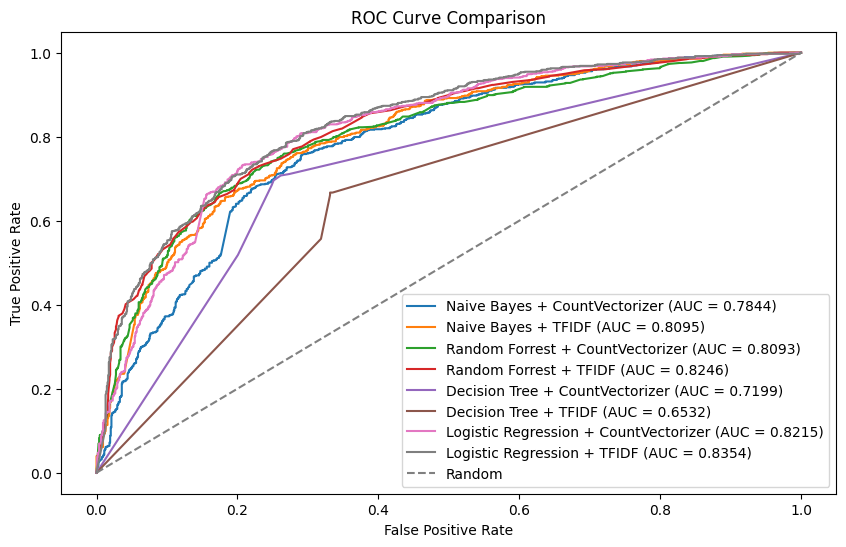

In [49]:
plt.figure(figsize=(10, 6))
for name, metrics in results.items():
    plt.plot(metrics['roc_curve']['fpr'], metrics['roc_curve']['tpr'], label=f"{name} (AUC = {metrics['auc']:.4f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()